In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro
from scipy import stats

# Scale 변환-> 설명변수 변환 : 회귀분석.설명변수 회귀계수 표준화
from sklearn.preprocessing import StandardScaler

# train, test 데이터 분할 함수
from sklearn.model_selection import train_test_split

# 회귀모델 
import statsmodels.formula.api as smf
import statsmodels.api as sm
# 선형회귀모형
from sklearn.linear_model import LinearRegression

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE

# 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from statsmodels.formula.api import ols

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False
# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

import warnings # 폰트체크 경고 무시
warnings.filterwarnings('ignore')

In [3]:
df_raw = pd.read_csv("/home/piai/다운로드/2주차 실습파일/2. Big Data 분석/SCALE불량.csv",encoding = "euc-kr")
df_raw

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,10JAN2023:05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,2열,1142,55,1151,86,203,CR(제어압연),948,10,4조
996,PLT_1997,10JAN2023:05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,2열,1142,55,1151,86,209,CR(제어압연),948,10,4조
997,PLT_1998,10JAN2023:05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,2열,1169,65,1163,77,227,CR(제어압연),948,10,4조
998,PLT_1999,10JAN2023:06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,2열,1169,65,1163,77,204,CR(제어압연),948,10,4조


In [4]:
df_raw.isnull().sum()

plate_no           0
rolling_date       0
scale              0
spec_long          0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

In [31]:
df_raw.describe()

,scale,pt_thick,pt_width,pt_length,hsb,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count
count,947.000000,947.000000,947.000000,947.000000,947.0,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,0.277719,26.674762,2830.517423,36755.121436,0.0,1157.199578,86.174234,1150.885956,71.695882,238.662091,0.839493,940.630412,8.546990
std,0.448111,17.829170,492.639316,13877.501780,0.0,21.165993,26.384141,17.299919,20.625125,38.035616,0.367269,64.271068,1.598314
min,0.000000,12.000000,1800.000000,7900.000000,0.0,1103.000000,55.000000,1113.000000,35.000000,165.000000,0.000000,723.000000,5.000000
25%,0.000000,15.000000,2500.000000,26450.000000,0.0,1140.000000,66.000000,1136.000000,57.000000,210.000000,1.000000,894.000000,8.000000
50%,0.000000,20.000000,2800.000000,40300.000000,0.0,1159.000000,75.000000,1156.000000,66.000000,230.000000,1.000000,949.000000,9.000000
75%,1.000000,34.000000,3100.000000,49100.000000,0.0,1172.000000,103.000000,1164.000000,81.000000,263.000000,1.000000,993.000000,10.000000
max,1.000000,100.000000,4600.000000,54900.000000,0.0,1206.000000,158.000000,1185.000000,144.000000,362.000000,1.000000,1078.000000,10.000000


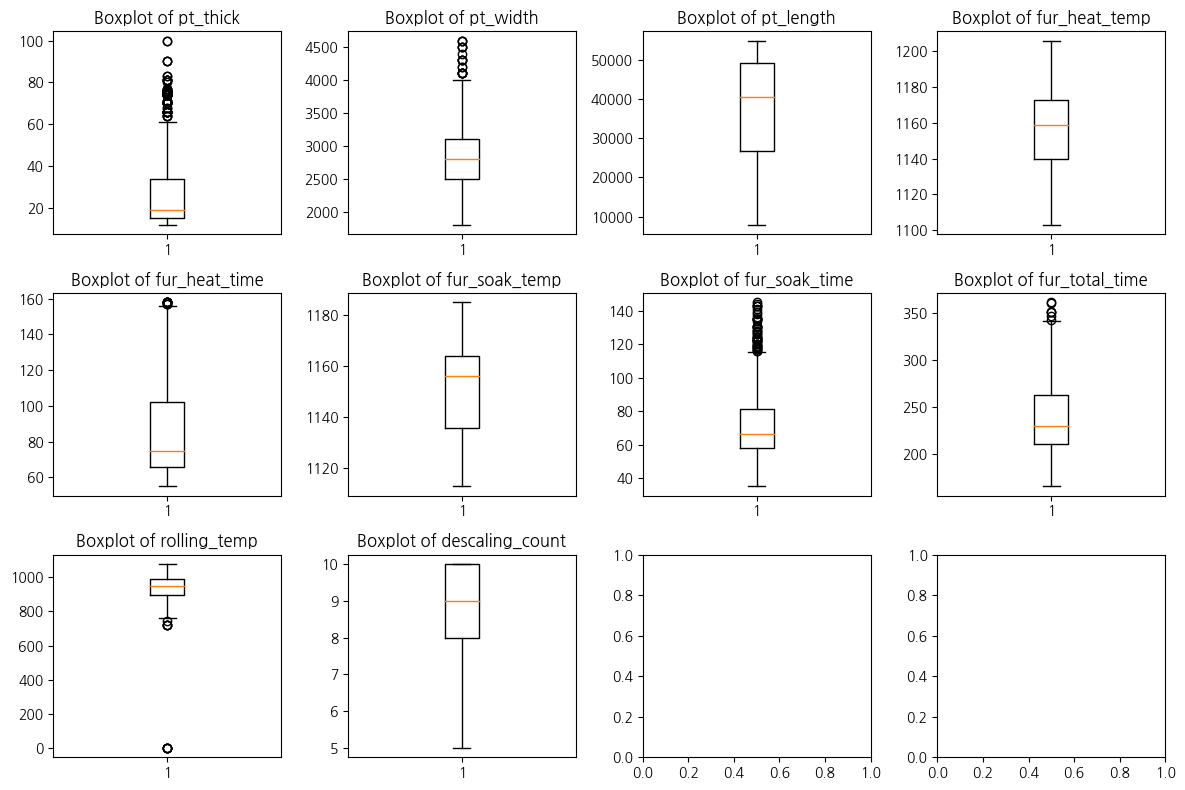

In [5]:
# 이상치 확인
variables = ['pt_thick', 'pt_width', 'pt_length', 'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp', 'fur_soak_time',
             'fur_total_time', 'rolling_temp', 'descaling_count']

# Boxplot
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))  # 3행 4열의 subplot 생성
axes = axes.flatten()  # 2차원 배열을 1차원으로 펼치기

for i, variable in enumerate(variables):
    axes[i].boxplot(df_raw[variable])
    axes[i].set_title(f"Boxplot of {variable}")

# subplot 간 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()

In [6]:
df_raw.columns

Index(['plate_no', 'rolling_date', 'scale', 'spec_long', 'spec_country',
       'steel_kind', 'pt_thick', 'pt_width', 'pt_length', 'hsb', 'fur_no',
       'fur_input_row', 'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp',
       'fur_soak_time', 'fur_total_time', 'rolling_method', 'rolling_temp',
       'descaling_count', 'work_group'],
      dtype='object')

In [7]:
df_raw.drop(['plate_no','rolling_date','spec_long','spec_country'], axis = 1, inplace = True)
##plate_no/ 고유변호로 큰의미가 없음
##rolling_date/시작시간이라 큰 의미가 없음
##spec_long,spec_country/고객들이 요구한 제품이라 제품 규격은 큰의미 없음

In [8]:
df_raw['scale'].replace({"양품":0,"불량":1},inplace=True)
##scale이 목표변수이기 때문에 컴퓨터가 읽을 수 있게 변환
##양품=0,불량품=1로 구분했다.

In [9]:
df_raw['hsb'].replace({"적용": 0, "미적용": 1}, inplace=True)
df_raw['rolling_method'].replace({"TMCP(온도제어)": 0, "CR(제어압연)": 1}, inplace=True)

In [10]:
df_raw.columns

Index(['scale', 'steel_kind', 'pt_thick', 'pt_width', 'pt_length', 'hsb',
       'fur_no', 'fur_input_row', 'fur_heat_temp', 'fur_heat_time',
       'fur_soak_temp', 'fur_soak_time', 'fur_total_time', 'rolling_method',
       'rolling_temp', 'descaling_count', 'work_group'],
      dtype='object')

In [11]:
df_raw.dtypes

scale               int64
steel_kind         object
pt_thick            int64
pt_width            int64
pt_length           int64
hsb                 int64
fur_no             object
fur_input_row      object
fur_heat_temp       int64
fur_heat_time       int64
fur_soak_temp       int64
fur_soak_time       int64
fur_total_time      int64
rolling_method      int64
rolling_temp        int64
descaling_count     int64
work_group         object
dtype: object

In [12]:
df_raw.shape

(1000, 17)

In [13]:
df_raw.head()

,scale,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,0,T,32,3700,15100,0,1호기,1열,1144,116,1133,59,259,0,934,8,1조
1,0,T,32,3700,15100,0,1호기,2열,1144,122,1135,53,238,0,937,8,1조
2,0,T,33,3600,19200,0,2호기,1열,1129,116,1121,55,258,0,889,8,1조
3,0,T,33,3600,19200,0,2호기,2열,1152,125,1127,68,266,0,885,8,1조
4,0,T,38,3100,13300,0,3호기,1열,1140,134,1128,48,246,0,873,8,1조


<Axes: title={'center': 'rolling_temp'}, xlabel='scale'>

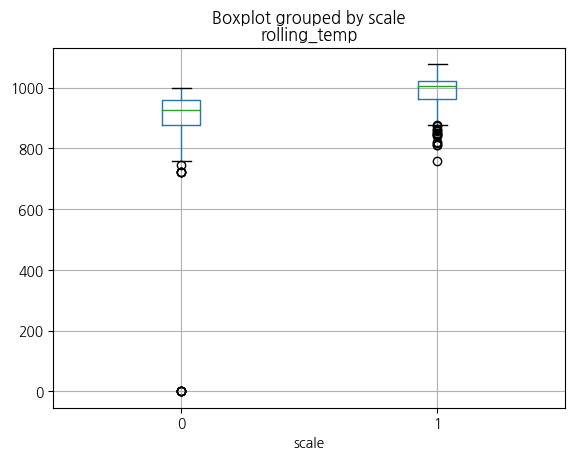

In [14]:
##rolling_temp 이상치 처리 -1
df_raw.boxplot(column = "rolling_temp", by = "scale")

In [15]:
# boxplot 그래프 보고 600 잡음
df_raw = df_raw[df_raw['rolling_temp'] > 600]
df_raw

,scale,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,0,T,32,3700,15100,0,1호기,1열,1144,116,1133,59,259,0,934,8,1조
1,0,T,32,3700,15100,0,1호기,2열,1144,122,1135,53,238,0,937,8,1조
2,0,T,33,3600,19200,0,2호기,1열,1129,116,1121,55,258,0,889,8,1조
3,0,T,33,3600,19200,0,2호기,2열,1152,125,1127,68,266,0,885,8,1조
4,0,T,38,3100,13300,0,3호기,1열,1140,134,1128,48,246,0,873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,C,19,3400,41500,0,1호기,2열,1142,55,1151,86,203,1,948,10,4조
996,0,C,19,3400,41500,0,1호기,2열,1142,55,1151,86,209,1,948,10,4조
997,0,C,17,3400,43700,0,2호기,2열,1169,65,1163,77,227,1,948,10,4조
998,0,C,17,3400,43700,0,2호기,2열,1169,65,1163,77,204,1,948,10,4조


<Axes: >

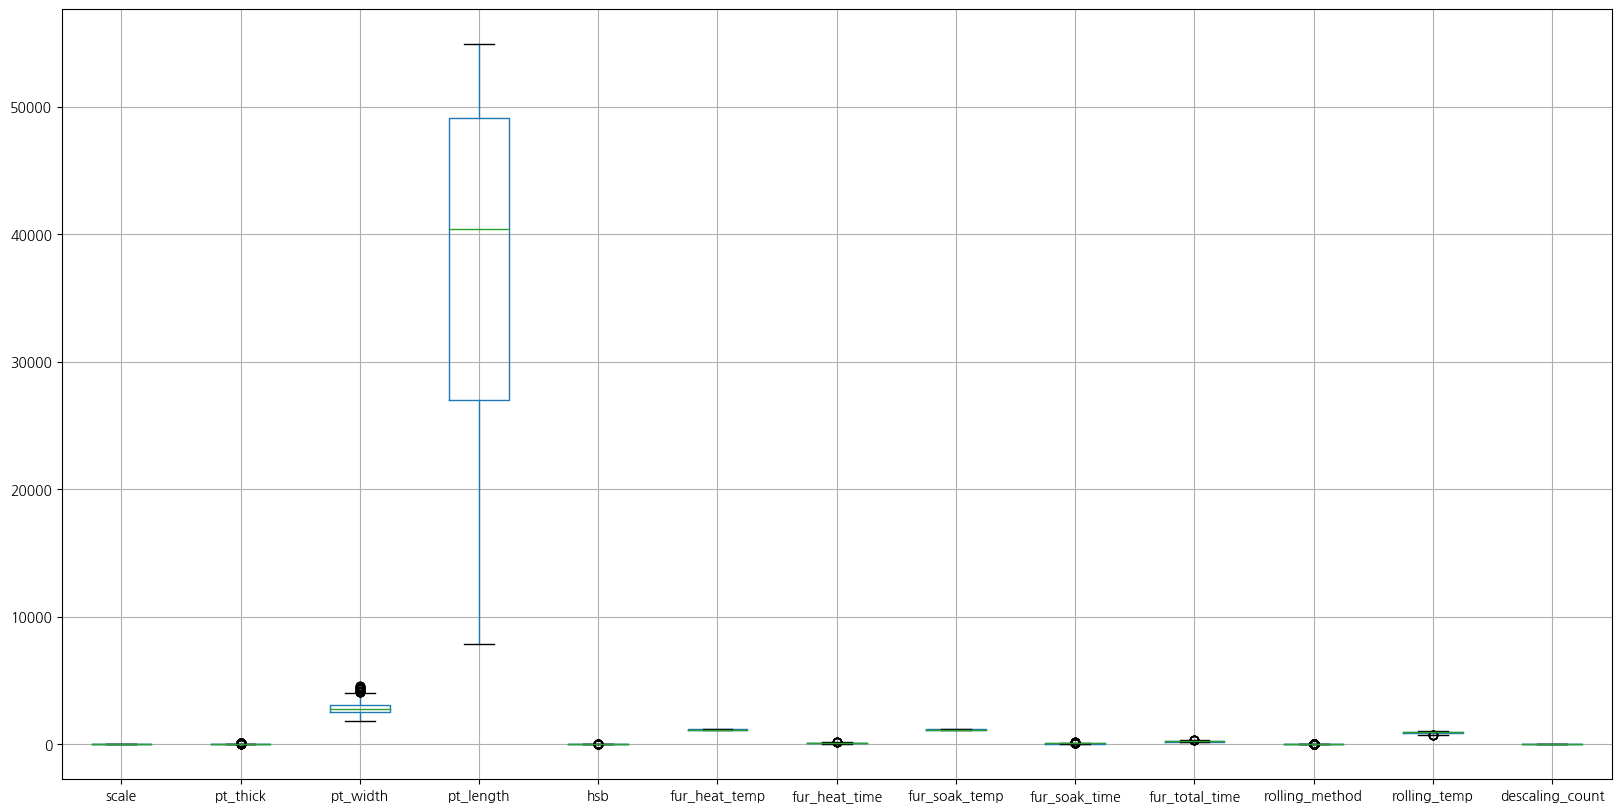

In [16]:
df_raw.boxplot(figsize=(20,10)) ##이상치 제거 후 boxplot

In [17]:
df_raw.shape

(994, 17)

In [18]:
## 열이나 호기 단위를 없앰(단위제거)
df_raw['fur_no'] = df_raw['fur_no'].str.replace("호기", "")
df_raw['fur_input_row'] = df_raw['fur_input_row'].str.replace("열", "")
df_raw['work_group'] = df_raw['work_group'].str.replace("조", "")

In [19]:
df_raw

,scale,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,0,T,32,3700,15100,0,1,1,1144,116,1133,59,259,0,934,8,1
1,0,T,32,3700,15100,0,1,2,1144,122,1135,53,238,0,937,8,1
2,0,T,33,3600,19200,0,2,1,1129,116,1121,55,258,0,889,8,1
3,0,T,33,3600,19200,0,2,2,1152,125,1127,68,266,0,885,8,1
4,0,T,38,3100,13300,0,3,1,1140,134,1128,48,246,0,873,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,C,19,3400,41500,0,1,2,1142,55,1151,86,203,1,948,10,4
996,0,C,19,3400,41500,0,1,2,1142,55,1151,86,209,1,948,10,4
997,0,C,17,3400,43700,0,2,2,1169,65,1163,77,227,1,948,10,4
998,0,C,17,3400,43700,0,2,2,1169,65,1163,77,204,1,948,10,4


In [20]:
df_raw.dtypes

scale               int64
steel_kind         object
pt_thick            int64
pt_width            int64
pt_length           int64
hsb                 int64
fur_no             object
fur_input_row      object
fur_heat_temp       int64
fur_heat_time       int64
fur_soak_temp       int64
fur_soak_time       int64
fur_total_time      int64
rolling_method      int64
rolling_temp        int64
descaling_count     int64
work_group         object
dtype: object

In [40]:
# 파생변수

#area 와 scale의 관계성
df_raw['area'] = df_raw['pt_width']*df_raw['pt_length']

# 새로 생성된 열을 포함한 데이터프레임의 상위 5개 행을 출력
df_raw[['pt_width', 'pt_length', 'area']].head()


,pt_width,pt_length,area
0,3700,15100,55870000
1,3700,15100,55870000
2,3600,19200,69120000
3,3600,19200,69120000
4,3100,13300,41230000


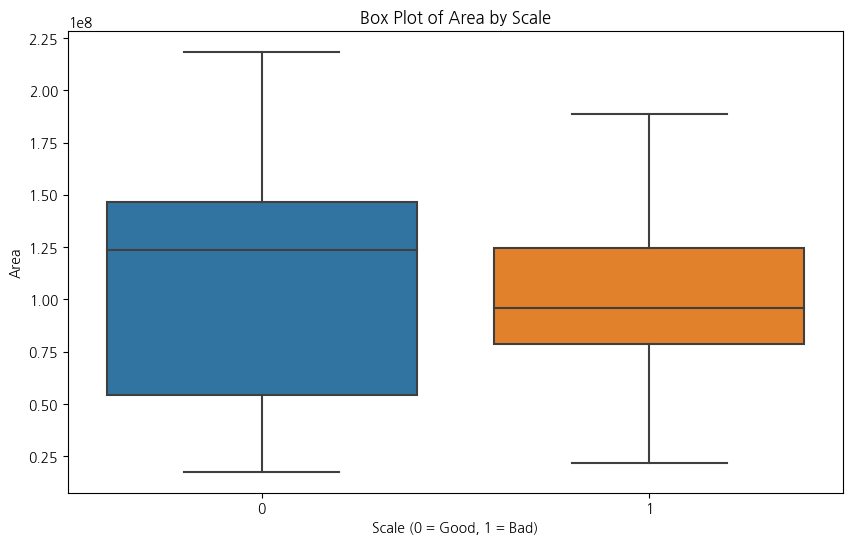

In [41]:
# scale 값에 따른 area의 분포를 박스 플롯으로 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='scale', y='area', data=df_raw)
plt.title('Box Plot of Area by Scale')
plt.xlabel('Scale (0 = Good, 1 = Bad)')
plt.ylabel('Area')
plt.show()

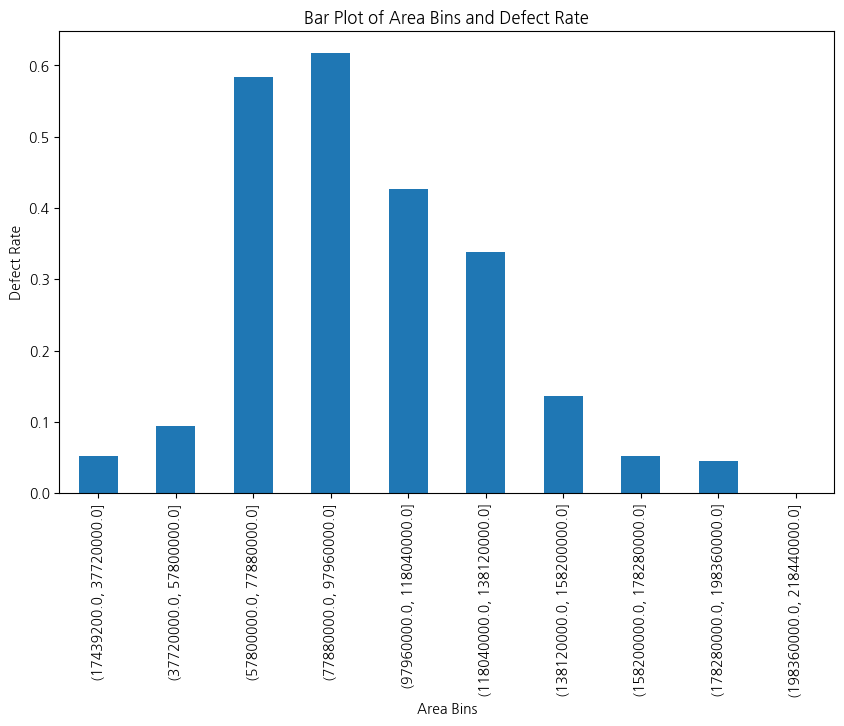

In [43]:
df_raw['area_bins'] = pd.cut(df_raw['area'], bins=10)
area_scale_rate = df_raw.groupby('area_bins')['scale'].mean()

# 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
area_scale_rate.plot(kind='bar')
plt.title('Bar Plot of Area Bins and Defect Rate')
plt.xlabel('Area Bins')
plt.ylabel('Defect Rate')
plt.show()

In [44]:
# 가열로 총 재로시간 분에 가열대 재로시간(분)
df_raw['fur_heat_ratio'] = df_raw['fur_heat_time'] / df_raw['fur_total_time']

# 새로 생성된 파생변수의 상위 5개 행을 확인
print(df_raw[['fur_heat_time', 'fur_total_time', 'fur_heat_ratio']].head())

   fur_heat_time  fur_total_time  fur_heat_ratio
0            116             259        0.447876
1            122             238        0.512605
2            116             258        0.449612
3            125             266        0.469925
4            134             246        0.544715


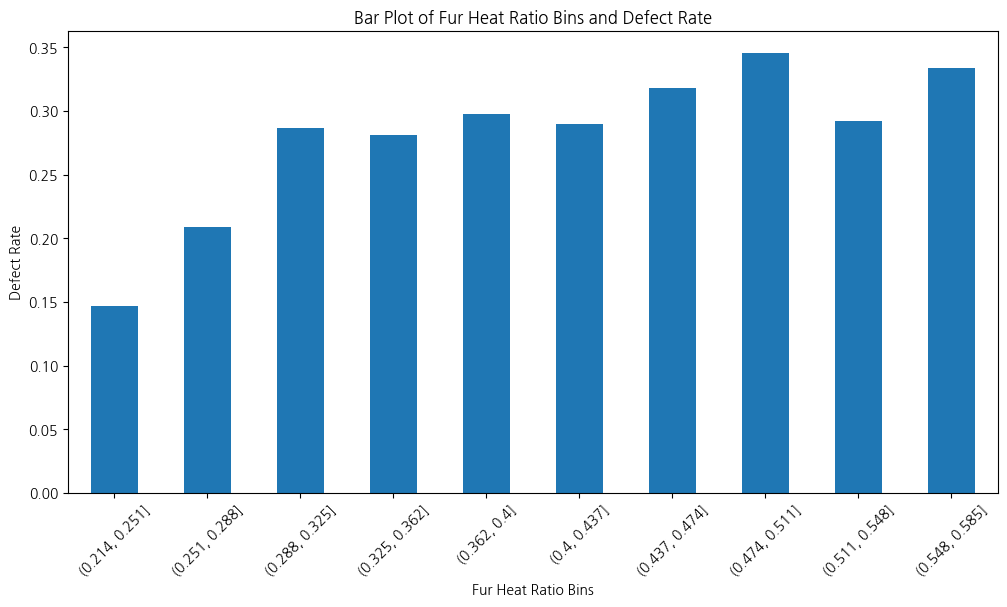

In [45]:
# fur_heat_ratio를 구간으로 나누기 (예: 10개의 동일한 크기 구간으로 나누기)
df_raw['fur_heat_ratio_bins'] = pd.cut(df_raw['fur_heat_ratio'], bins=10)

# 각 구간별로 scale의 평균값(불량률) 계산
mean_scale_by_heat_ratio = df_raw.groupby('fur_heat_ratio_bins')['scale'].mean()

# 막대 그래프로 시각화
plt.figure(figsize=(12, 6))
mean_scale_by_heat_ratio.plot(kind='bar')
plt.title('Bar Plot of Fur Heat Ratio Bins and Defect Rate')
plt.xlabel('Fur Heat Ratio Bins')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.show()

In [47]:
# 활성화 에너지 계산 (예: 임의의 공식 사용)
R = 8.314  # 기체 상수 (J/mol·K)
df_raw['activation_energy'] = R * (df_raw['fur_soak_temp'] + 273.15) * np.log(df_raw['fur_soak_time'] + 1)

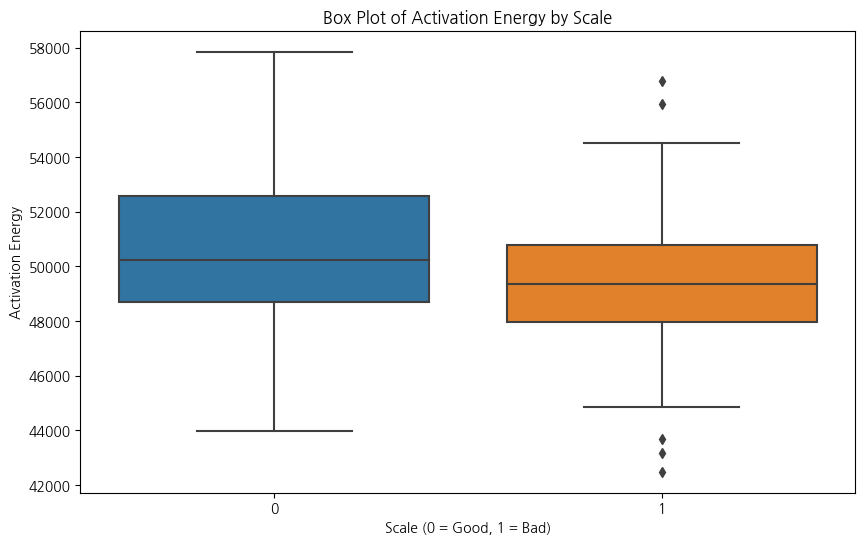

In [48]:

# 활성화 에너지와 scale 간의 관계를 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='scale', y='activation_energy', data=df_raw)
plt.title('Box Plot of Activation Energy by Scale')
plt.xlabel('Scale (0 = Good, 1 = Bad)')
plt.ylabel('Activation Energy')
plt.show()


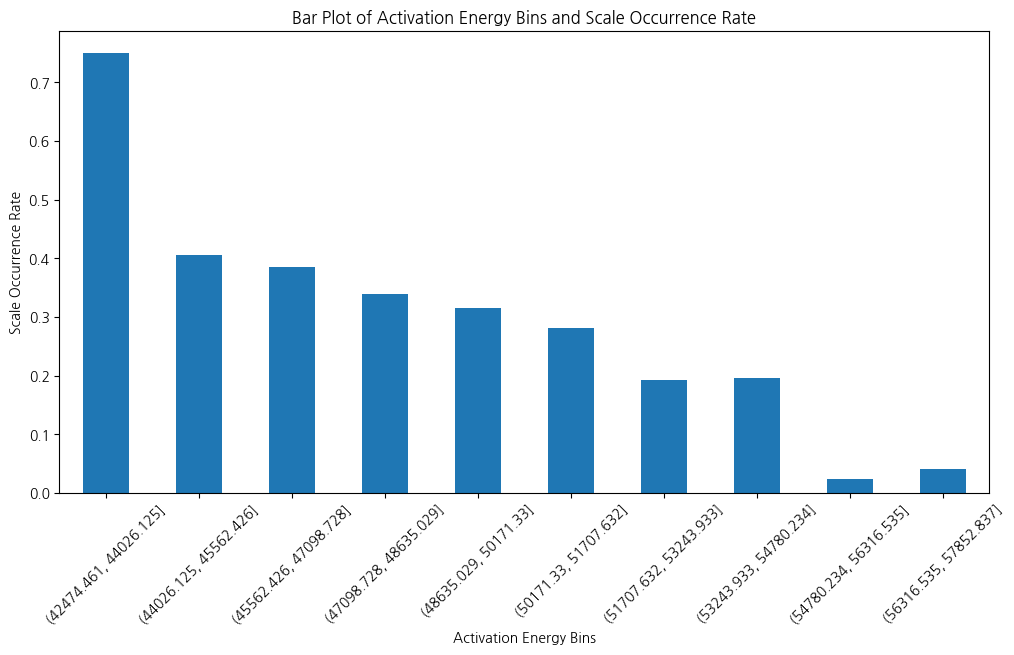

In [49]:
# 활성화 에너지를 구간화하여 scale과의 관계를 막대 그래프로 시각화
df_raw['activation_energy_bins'] = pd.cut(df_raw['activation_energy'], bins=10)
mean_scale_by_energy = df_raw.groupby('activation_energy_bins')['scale'].mean()

plt.figure(figsize=(12, 6))
mean_scale_by_energy.plot(kind='bar')
plt.title('Bar Plot of Activation Energy Bins and Scale Occurrence Rate')
plt.xlabel('Activation Energy Bins')
plt.ylabel('Scale Occurrence Rate')
plt.xticks(rotation=45)
plt.show()

# 층별화

In [21]:
df_raw['hsb'].value_counts()

0    947
1     47
Name: hsb, dtype: int64

In [22]:
df_raw = df_raw[df_raw['hsb'] == 0]  # hsb 적용이 0으로 인코딩되어 있다고 가정

In [23]:
df_raw['hsb'].value_counts()

0    947
Name: hsb, dtype: int64

steel_kind
C    35.335196
T     4.329004
Name: scale, dtype: float64


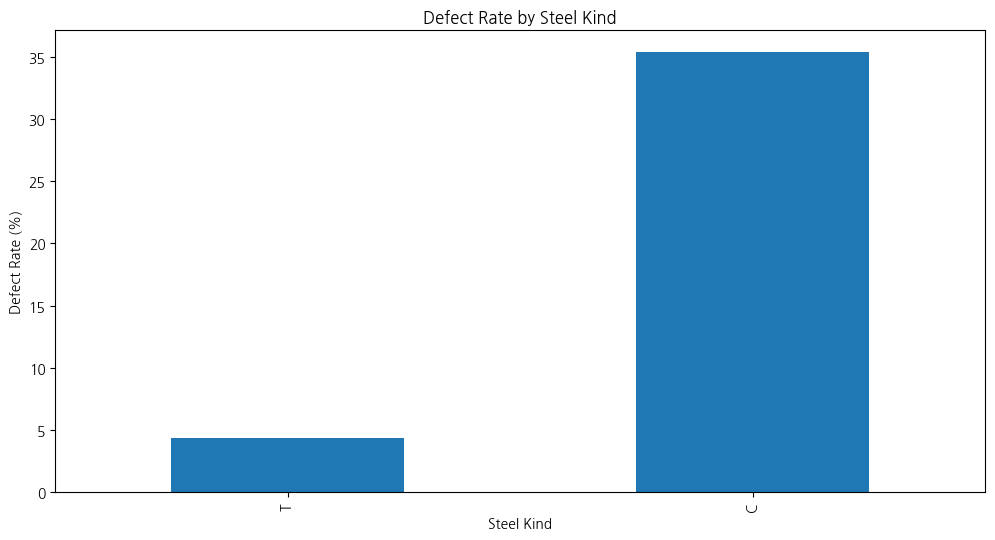

In [24]:
# 강종별 데이터 그룹화
steel_group = df_raw.groupby('steel_kind')

# 강종별 불량률 계산
defect_rate_by_steel_kind = steel_group['scale'].mean() * 100  # 불량률(%)로 변환

# 결과 출력
print(defect_rate_by_steel_kind)

# 시각화 (예: 막대 그래프)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
defect_rate_by_steel_kind.sort_values().plot(kind='bar')
plt.title('Defect Rate by Steel Kind')
plt.xlabel('Steel Kind')
plt.ylabel('Defect Rate (%)')
plt.show()


array([[<Axes: title={'center': 'scale'}>,
        <Axes: title={'center': 'pt_thick'}>,
        <Axes: title={'center': 'pt_width'}>,
        <Axes: title={'center': 'pt_length'}>],
       [<Axes: title={'center': 'hsb'}>,
        <Axes: title={'center': 'fur_heat_temp'}>,
        <Axes: title={'center': 'fur_heat_time'}>,
        <Axes: title={'center': 'fur_soak_temp'}>],
       [<Axes: title={'center': 'fur_soak_time'}>,
        <Axes: title={'center': 'fur_total_time'}>,
        <Axes: title={'center': 'rolling_method'}>,
        <Axes: title={'center': 'rolling_temp'}>],
       [<Axes: title={'center': 'descaling_count'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

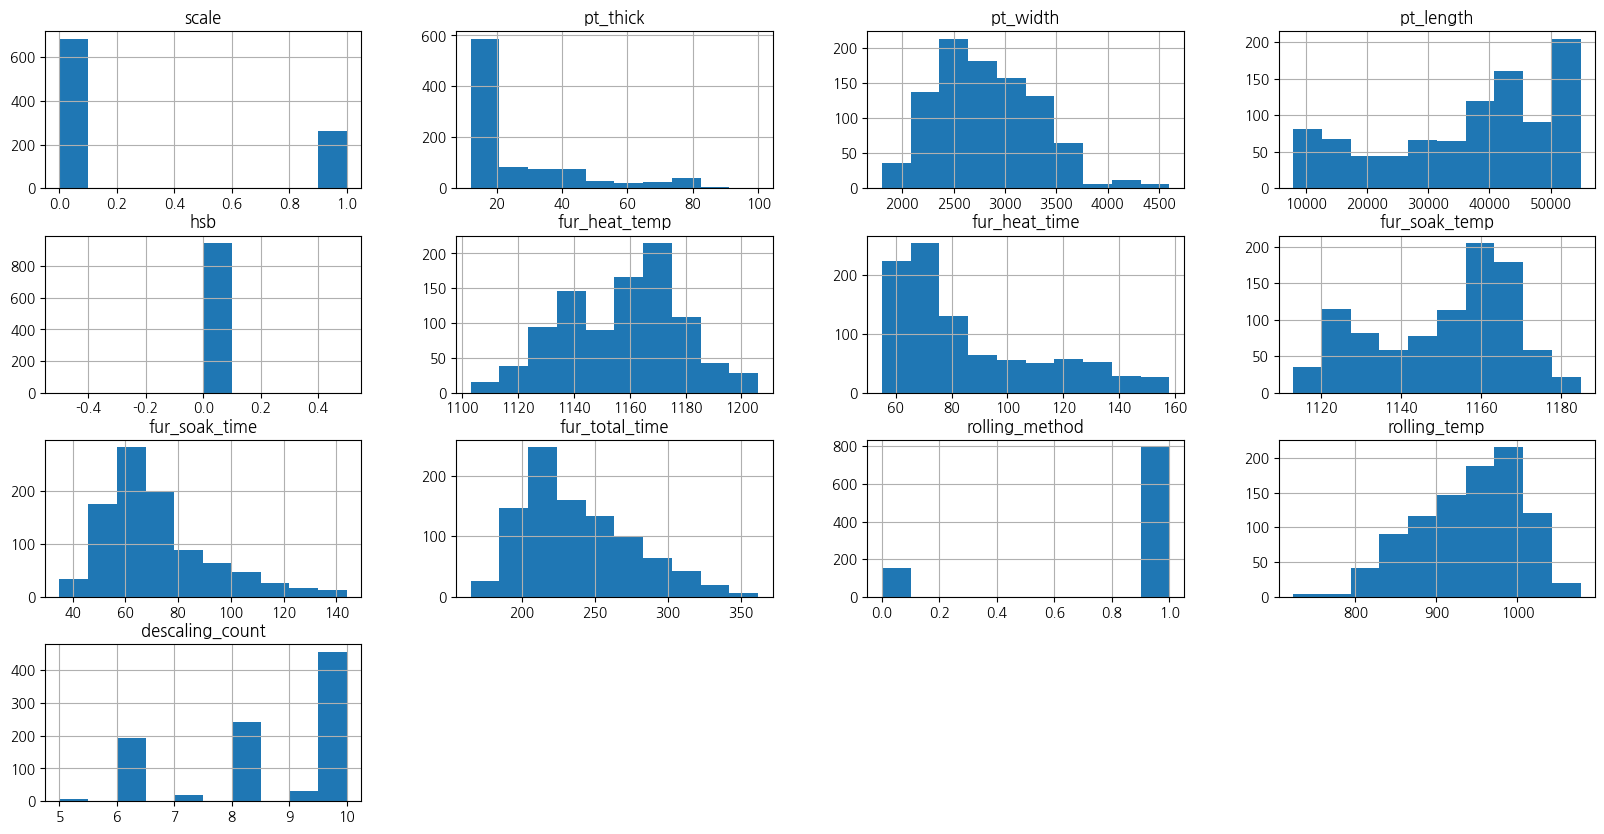

In [25]:
df_raw.hist(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

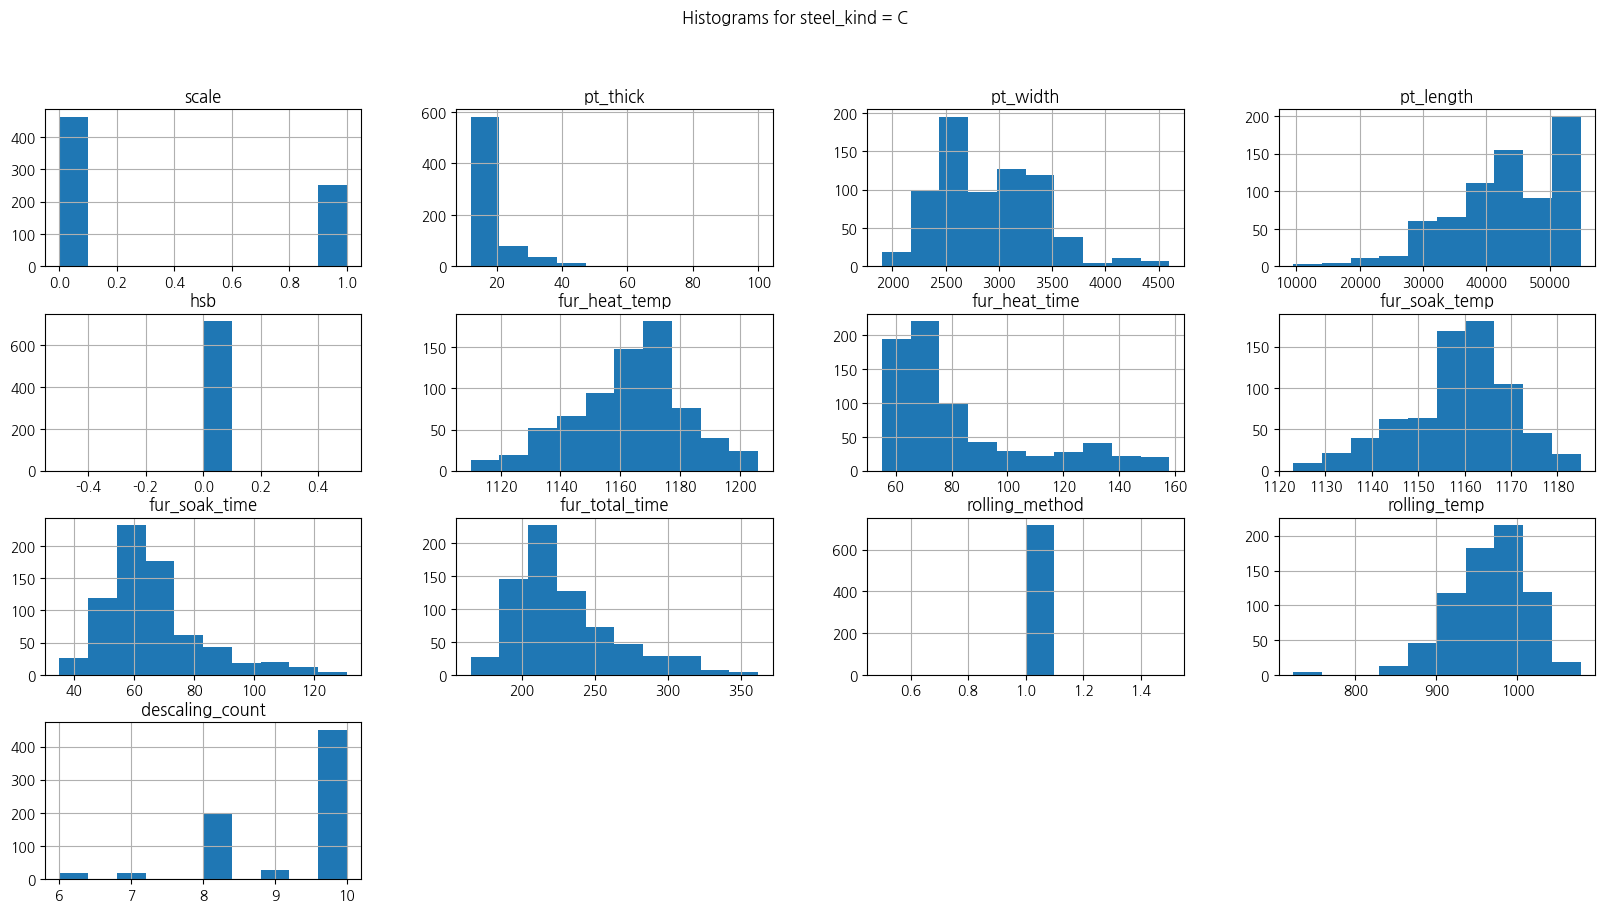

In [26]:
# Filter the data for steel_kind 'C'
df_raw_C = df_raw[df_raw['steel_kind'] == 'C']

# Plot histograms for the filtered data - steel_kind 'C'
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
df_raw_C.hist(figsize=(20, 10))
plt.suptitle('Histograms for steel_kind = C')
plt.show()


<Figure size 2000x1000 with 0 Axes>

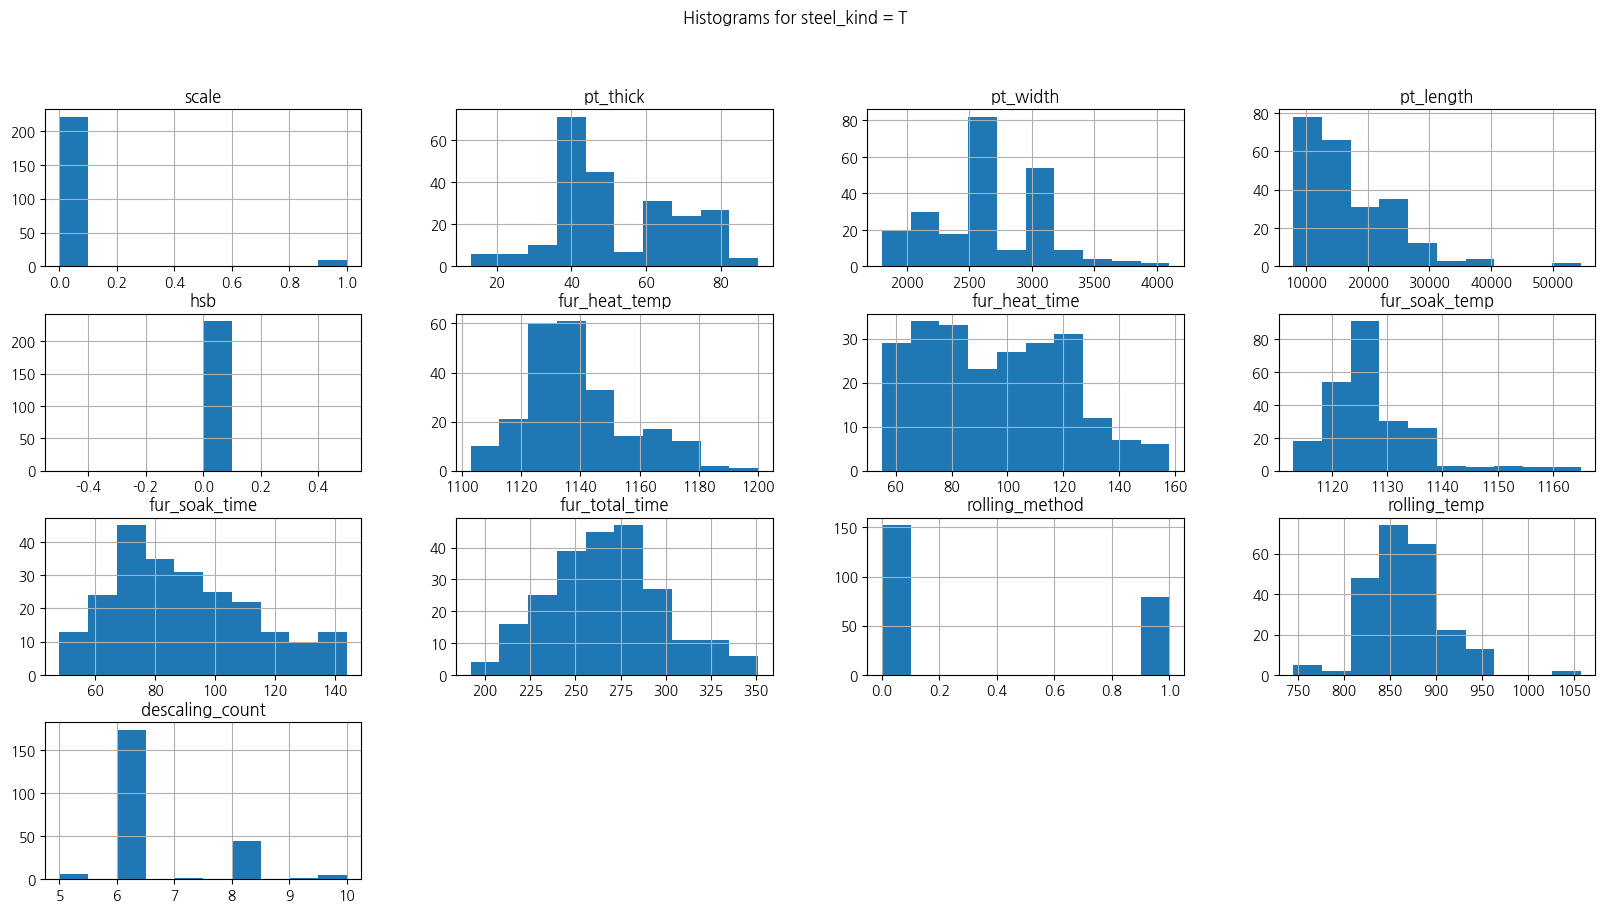

In [27]:
# Filter the data for steel_kind 'C'
df_raw_T = df_raw[df_raw['steel_kind'] == 'T']

# Plot histograms for the filtered data - steel_kind 'C'
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
df_raw_T.hist(figsize=(20, 10))
plt.suptitle('Histograms for steel_kind = T')
plt.show()

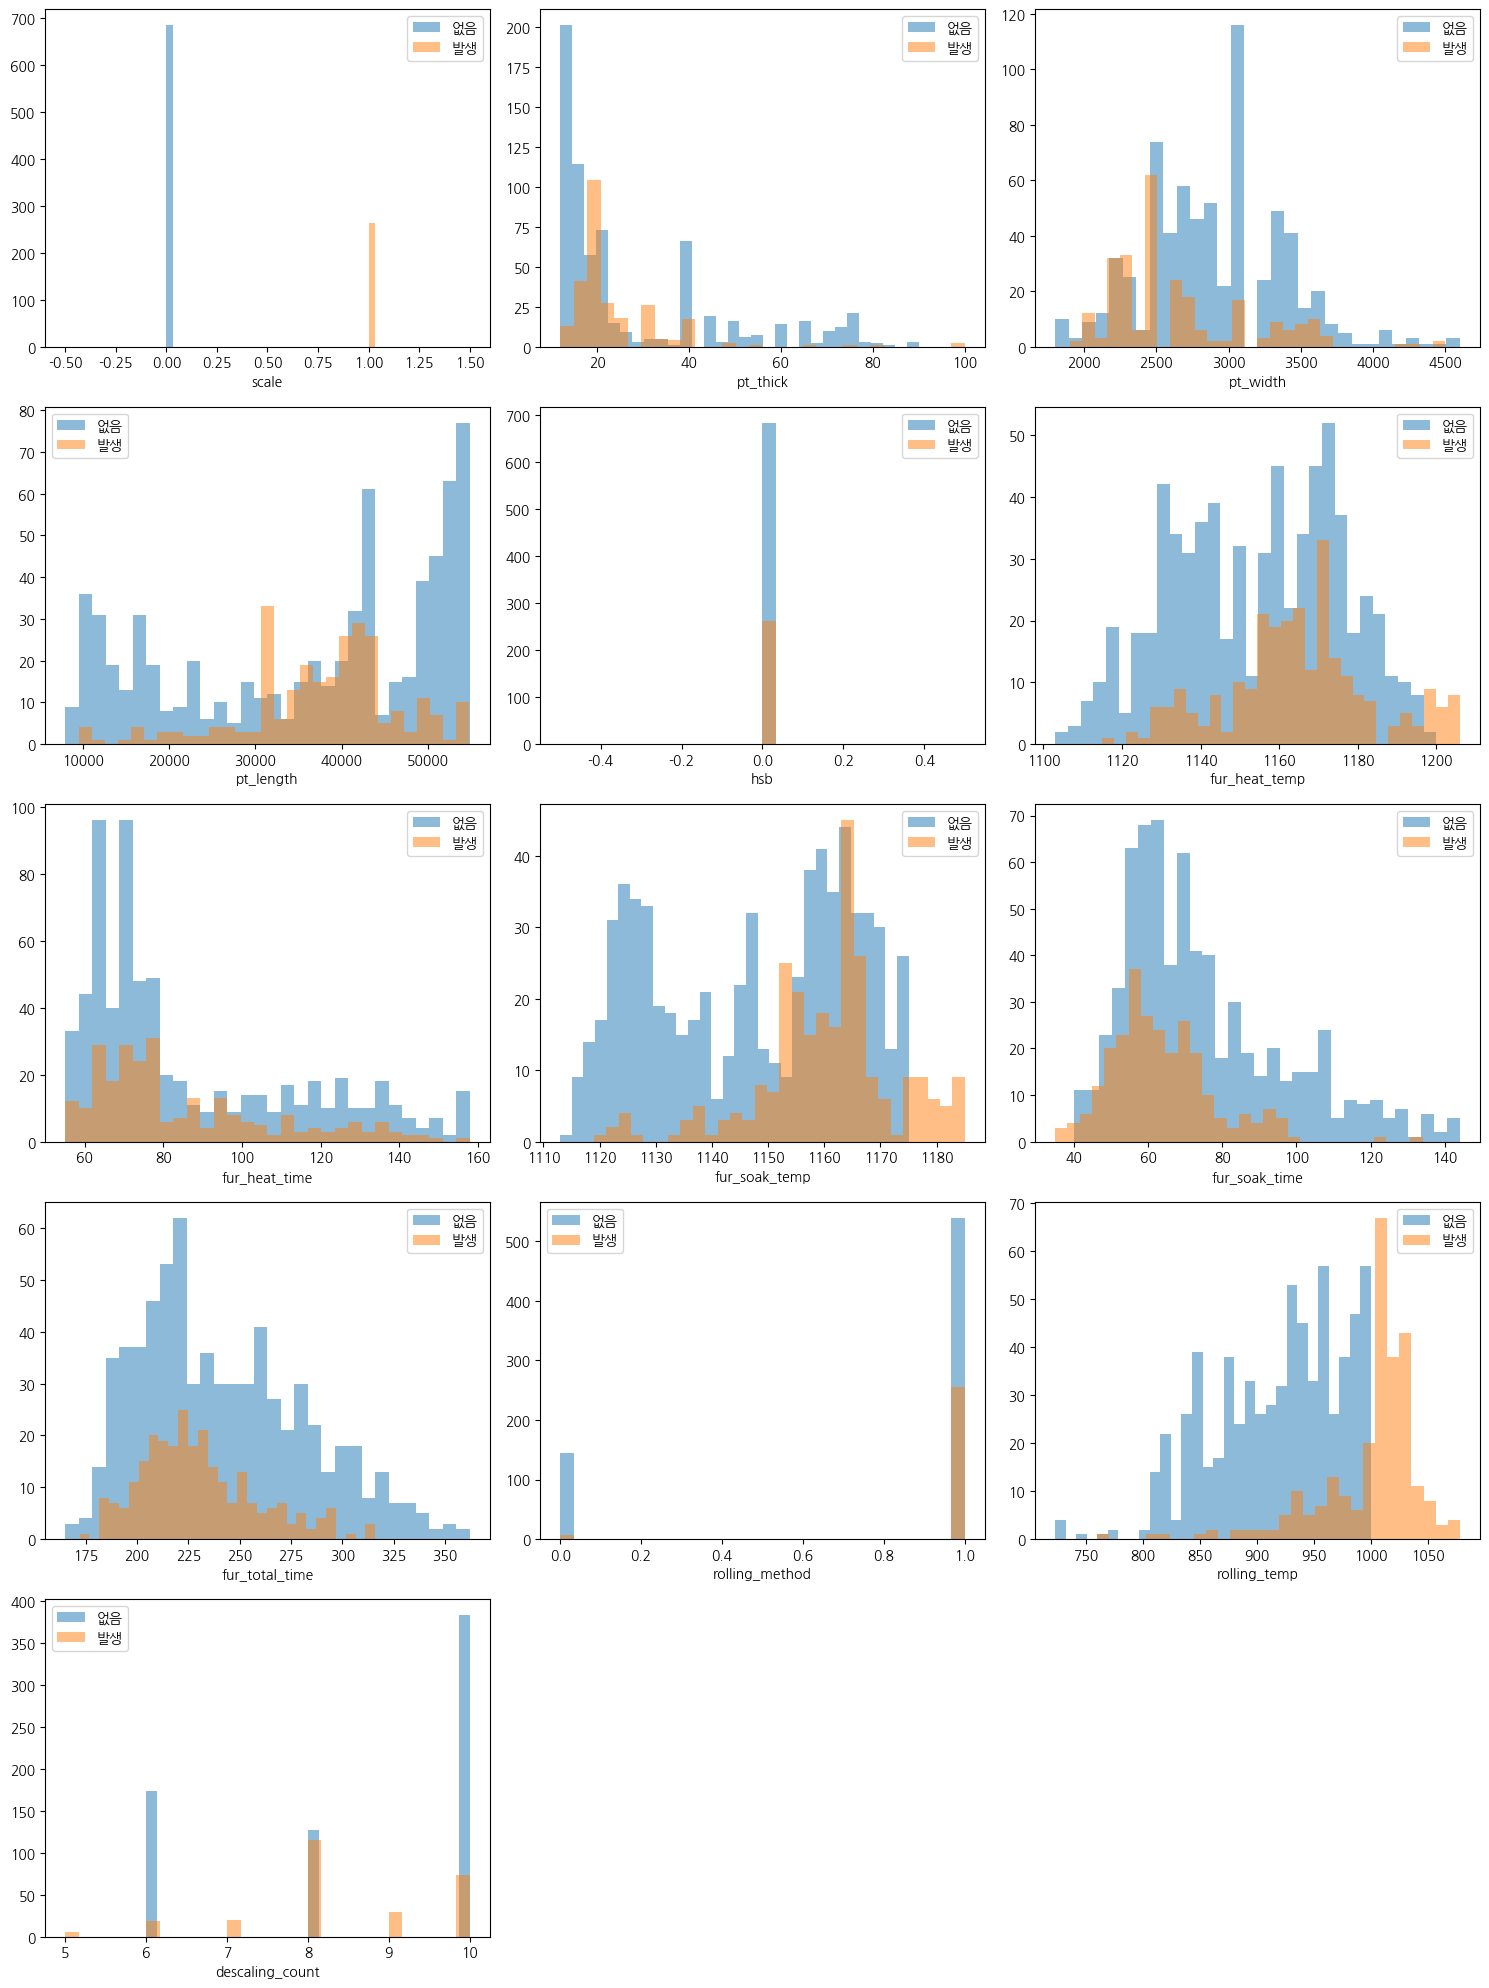

In [28]:
import matplotlib.pyplot as plt

# 연속형 변수만 선택
df_raw_numeric = df_raw.select_dtypes(include=[np.number])

# 서브플롯을 위한 설정
plt.figure(figsize=(15, 20))
i = 1

# 각 연속형 변수에 대해 히스토그램 생성
for col in df_raw_numeric.columns:
    plt.subplot(df_raw_numeric.shape[1]//3 + 1, 3, i)
    plt.hist(df_raw[df_raw["scale"] == 0][col].dropna(), label="없음", alpha=0.5, bins=30)
    plt.hist(df_raw[df_raw["scale"] == 1][col].dropna(), label="발생", alpha=0.5, bins=30)
    plt.xlabel(col)
    plt.legend()
    i += 1

plt.tight_layout()
plt.show()

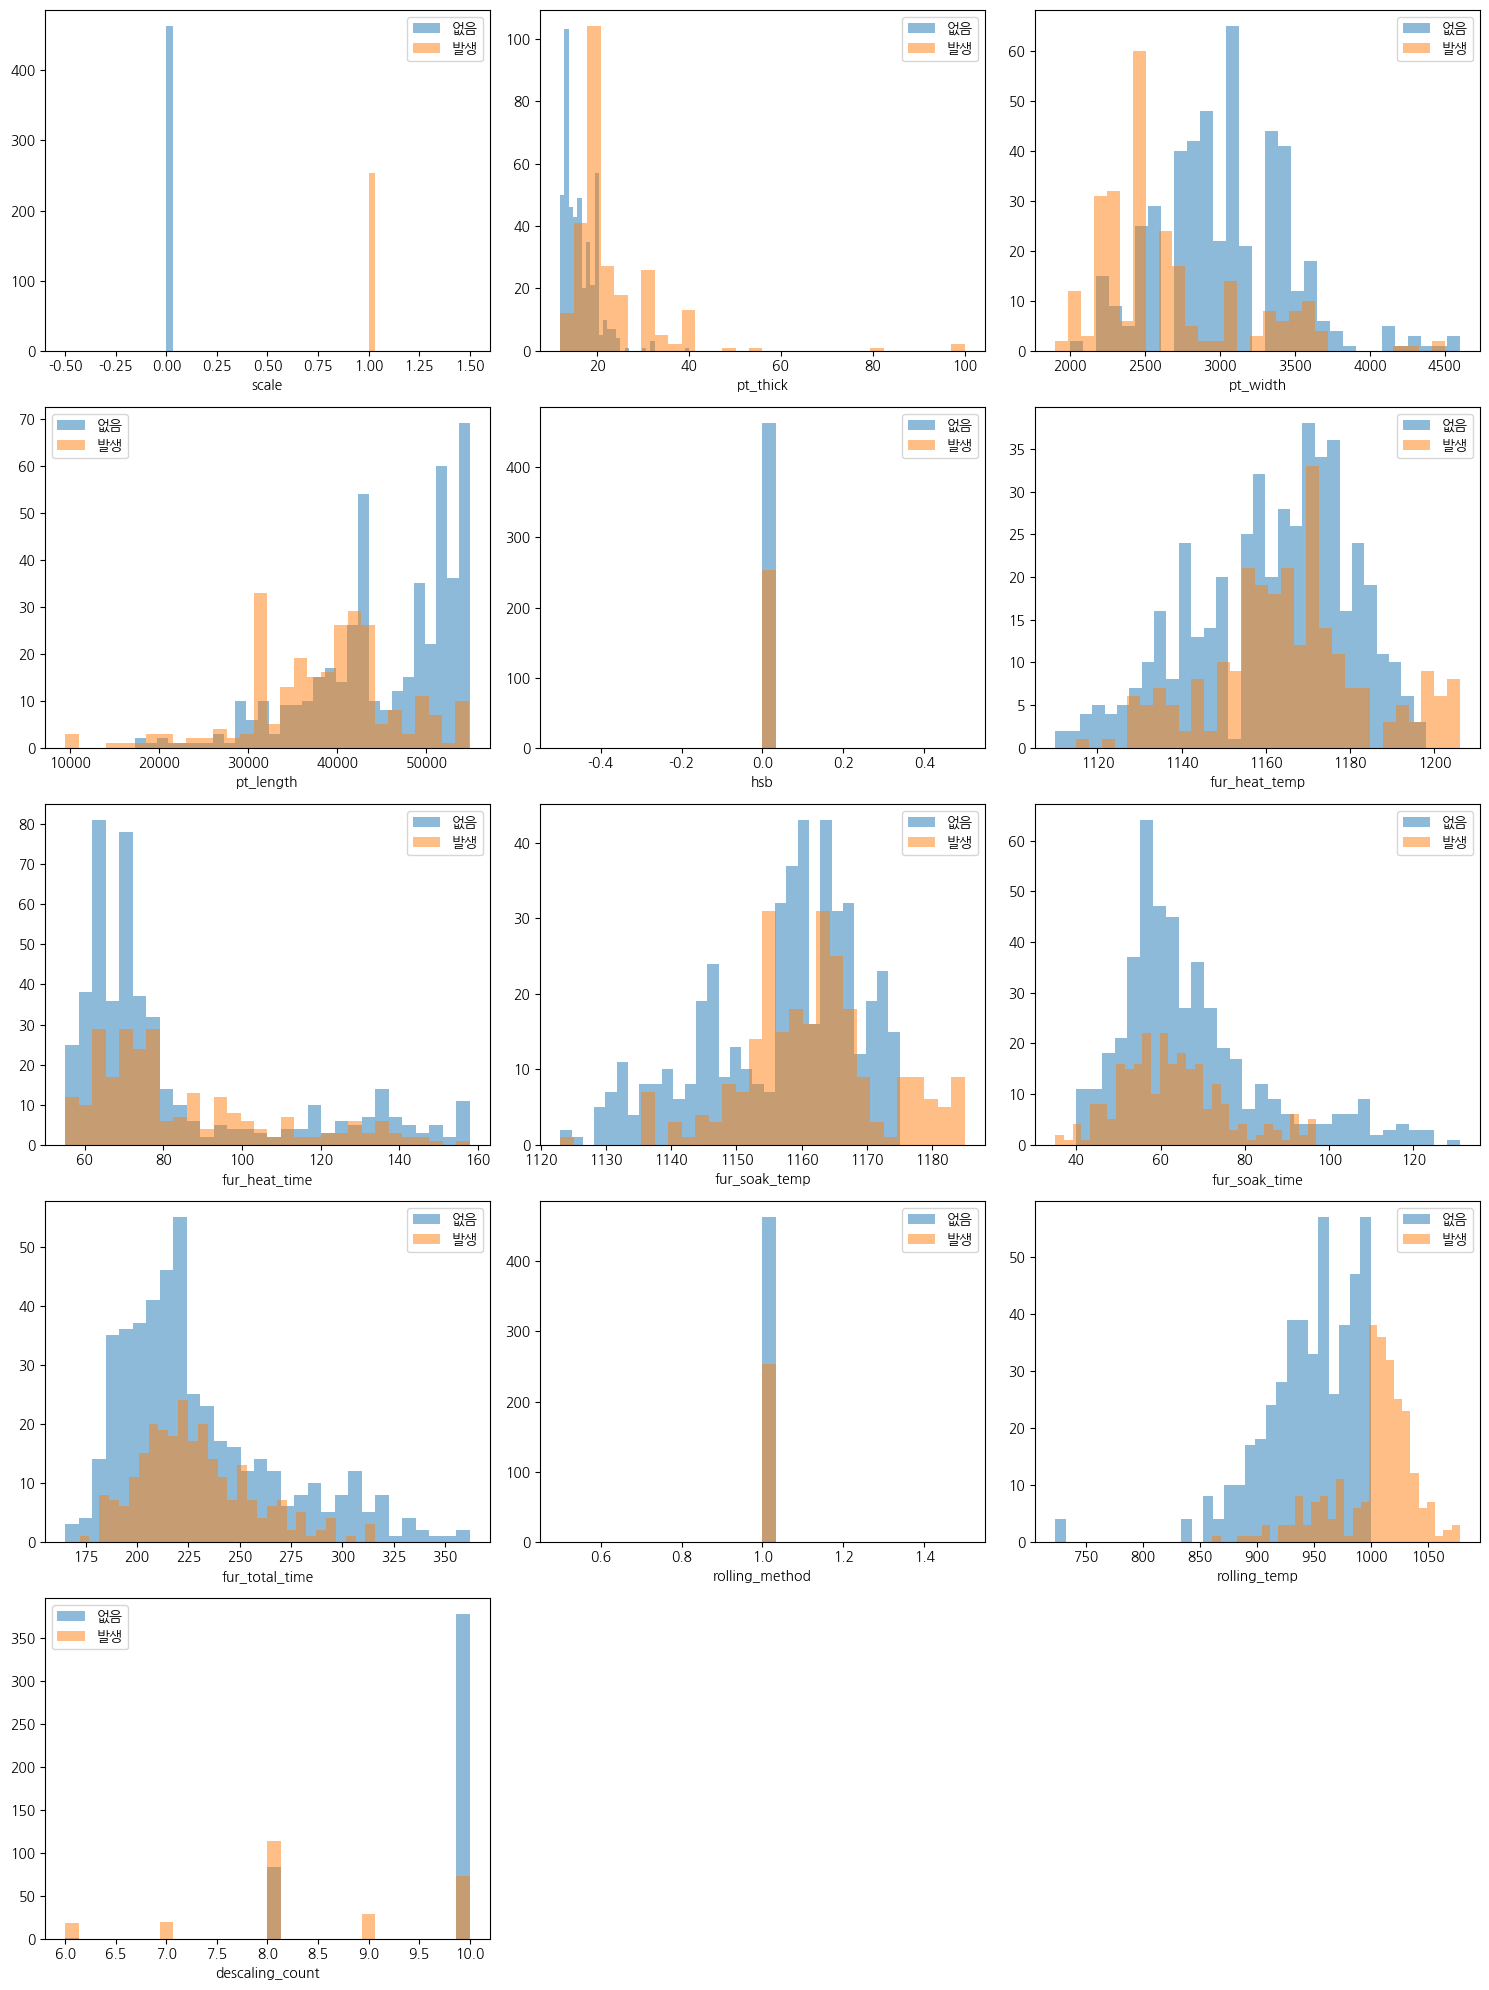

In [29]:
import matplotlib.pyplot as plt

# 연속형 변수만 선택
df_raw_C_numeric = df_raw_C.select_dtypes(include=[np.number])

# 서브플롯을 위한 설정
plt.figure(figsize=(15, 20))
i = 1

# 각 연속형 변수에 대해 히스토그램 생성
for col in df_raw_C_numeric.columns:
    plt.subplot(df_raw_C_numeric.shape[1]//3 + 1, 3, i)
    plt.hist(df_raw_C[df_raw_C["scale"] == 0][col].dropna(), label="없음", alpha=0.5, bins=30)
    plt.hist(df_raw_C[df_raw_C["scale"] == 1][col].dropna(), label="발생", alpha=0.5, bins=30)
    plt.xlabel(col)
    plt.legend()
    i += 1

plt.tight_layout()
plt.show()

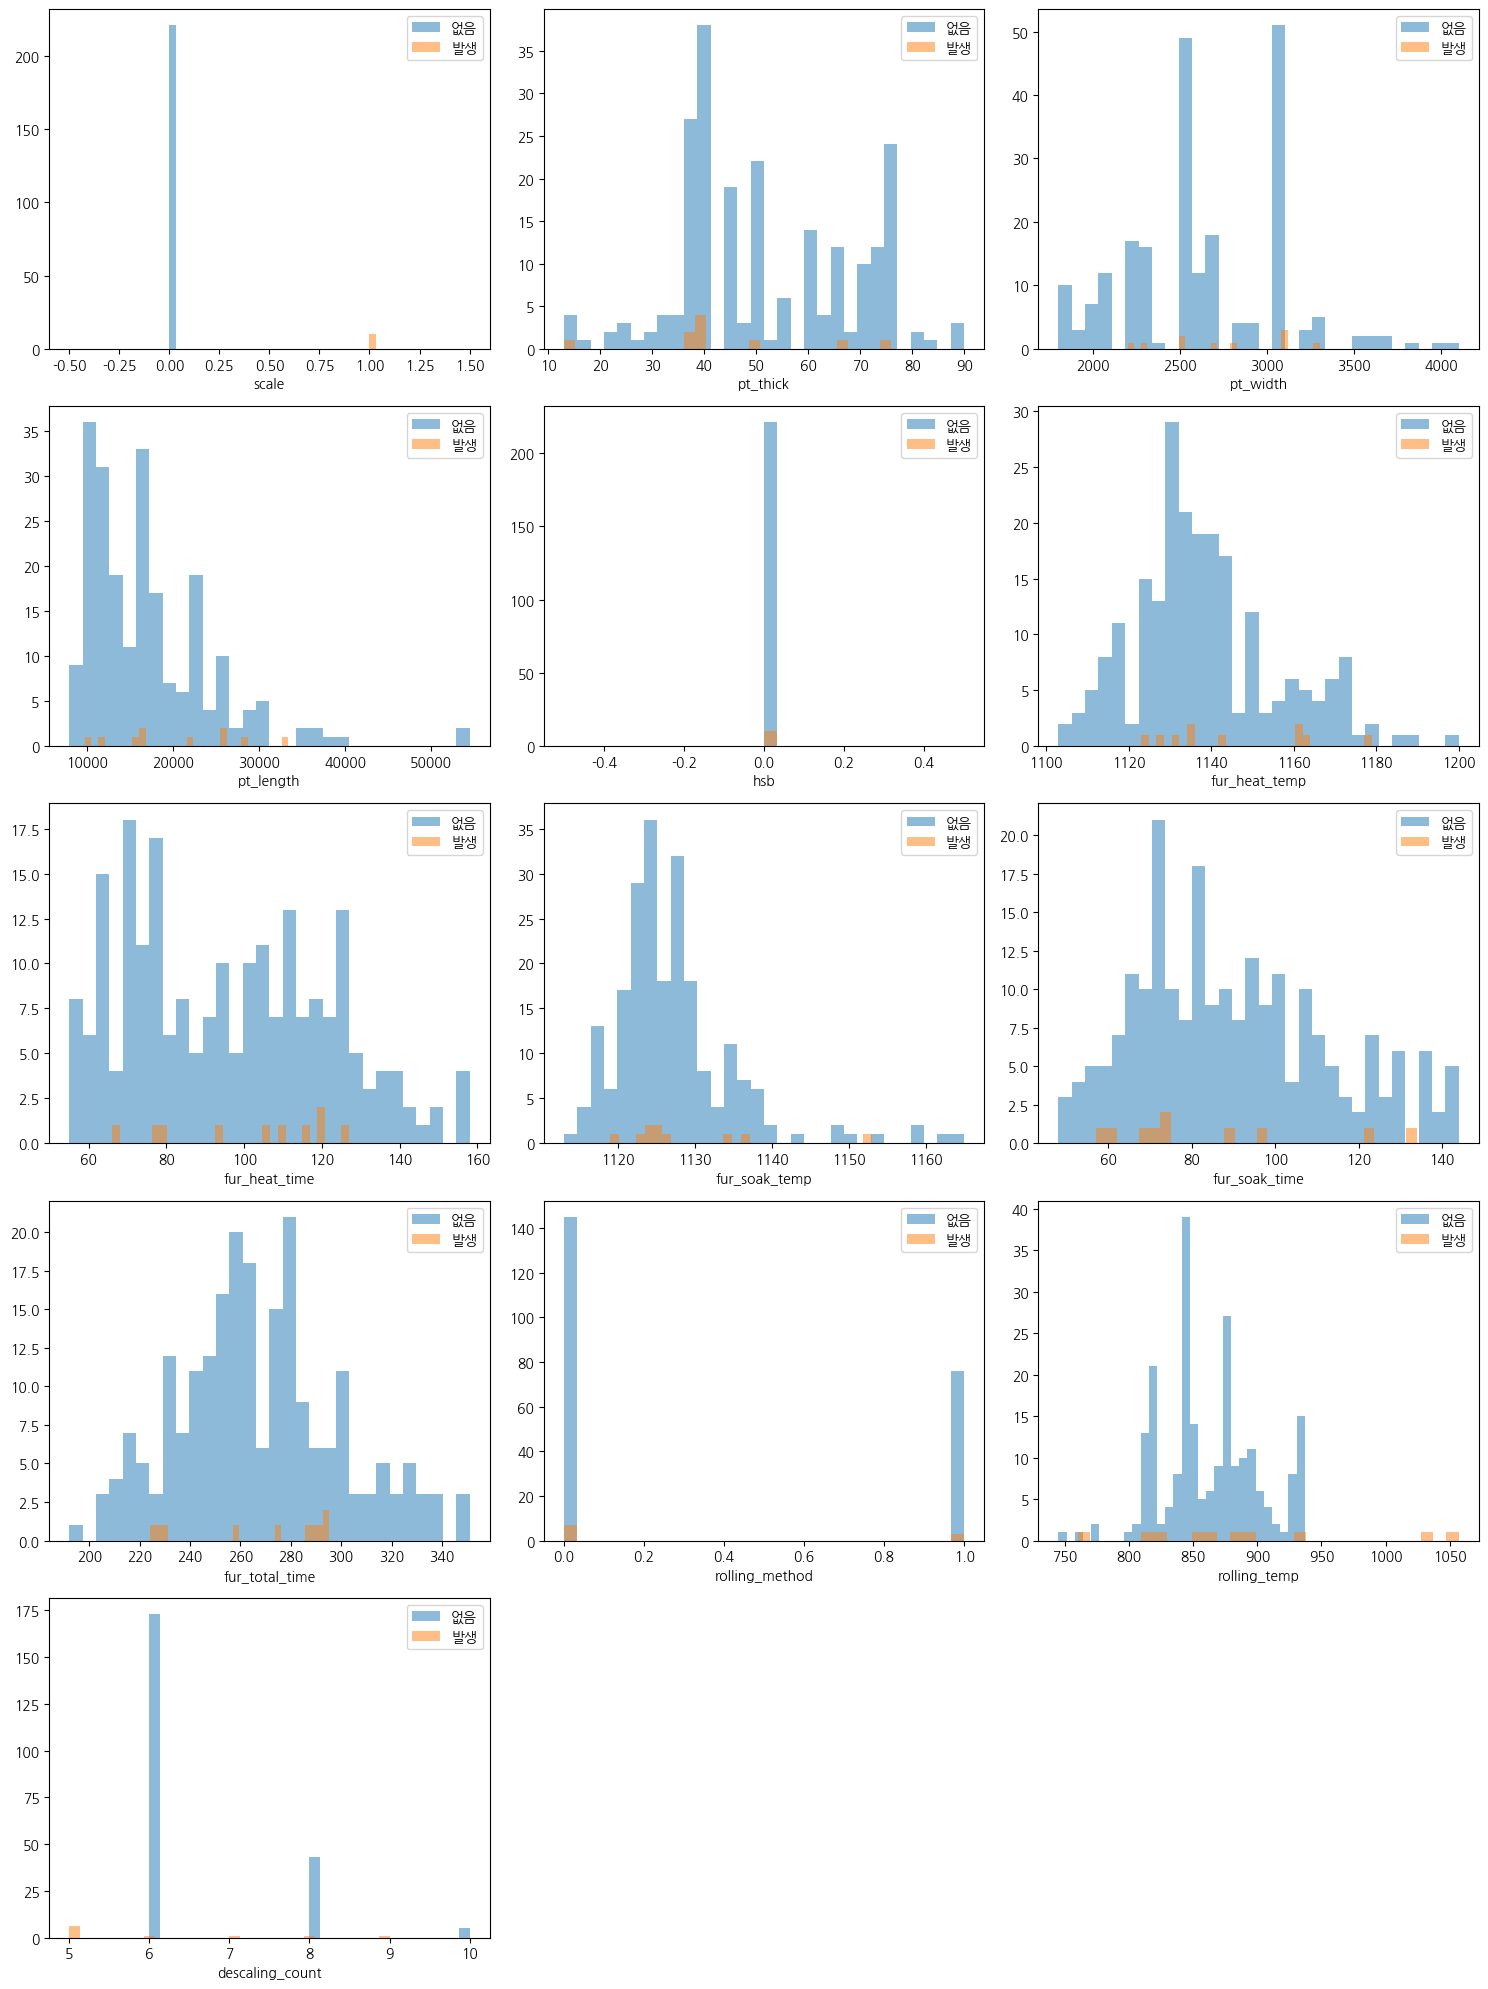

In [30]:
import matplotlib.pyplot as plt

# 연속형 변수만 선택
df_raw_T_numeric = df_raw_T.select_dtypes(include=[np.number])

# 서브플롯을 위한 설정
plt.figure(figsize=(15, 20))
i = 1

# 각 연속형 변수에 대해 히스토그램 생성
for col in df_raw_T_numeric.columns:
    plt.subplot(df_raw_T_numeric.shape[1]//3 + 1, 3, i)
    plt.hist(df_raw_T[df_raw_T["scale"] == 0][col].dropna(), label="없음", alpha=0.5, bins=30)
    plt.hist(df_raw_T[df_raw_T["scale"] == 1][col].dropna(), label="발생", alpha=0.5, bins=30)
    plt.xlabel(col)
    plt.legend()
    i += 1

plt.tight_layout()
plt.show()

# 데이터 전처리 + 기본 EDA 순서도 및 코드 정리 완료
#### 이제 어제 가설 1~12 체크할 예정